# Problem Statement:
The leading cause of death in the developed world is heart disease. Therefore, there needs
to be work done to help prevent the risks of having a heart attack or stroke. Use given dataset
to predict which patients are most likely to suffer from a heart disease in the near future using
the features given.

# Solution

## Task 1: Import Libraries/Dataset
> 1. Download the dataset
> 2. Import the required libraries



### 1: Download the dataset

Connect to the drive to load data from source file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the data into pandas dataframe df

In [ ]:
import pandas as pd

# import the dataset
df = pd.read_csv('/content/drive/MyDrive/Assignment_1_Classification/heart (1).csv')

### 2. Import the required libraries


In [ ]:
#Load the necessary python libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import scipy.stats as stats
import statsmodels.api as sm

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

sns.set_theme()
sns.set_palette(palette = "rainbow")
%matplotlib inline

## Task 2. Data Visualization and Exploration

### 1. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [ ]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [ ]:
df.shape

(1025, 14)

 we have 1025 rows and 14 columns. The first 13 columns represent the features and the last column represent the target/label.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<font color="orange">Observations & Justifications:</font>
<font color="darkcyan">
Attributes:-
1. age - age in years
2. sex - 1 = male; 0 = female
3. cp = chest pain type
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestrol in mg/dl
6. fbs - fasting blood sugar & gt; 120 mg/dl, 1 = true, 0 = false.
7. restecg - resting electrocardiographic resulsts
8. thalach - maximum heart rate achieved.
9. exang - exercise induced angina (1 = yes, 0=no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

</font>

### 2. Comment on class imbalance with appropriate visualization method.

The key to building a good machine learning model is the data it is trained on. Therefore it is imperative that the training data be clean and balanced. The more time you spend on perfecting your training data, the less efforts you’ll need to spend on your model.  When the majority of data items in your dataset represents items belonging to one class, we say the dataset is skewed or imbalanced

In [ ]:
df.shape

(1025, 14)

In [ ]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

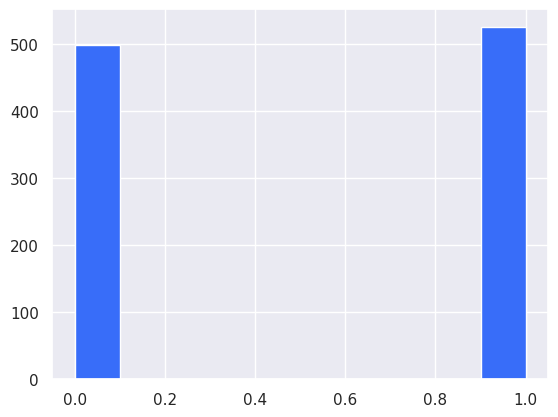

In [ ]:
plt.hist(df['target'])
plt.show()

<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> As you can see there is imbalance between the two classes. We have 1025 instances in our dataset and 526 positive instances, i.e., instances where heart disease present. Though the imbalance is not a major one.</font>

### 3. Provide appropriate data visualizations to get an insight about the dataset.




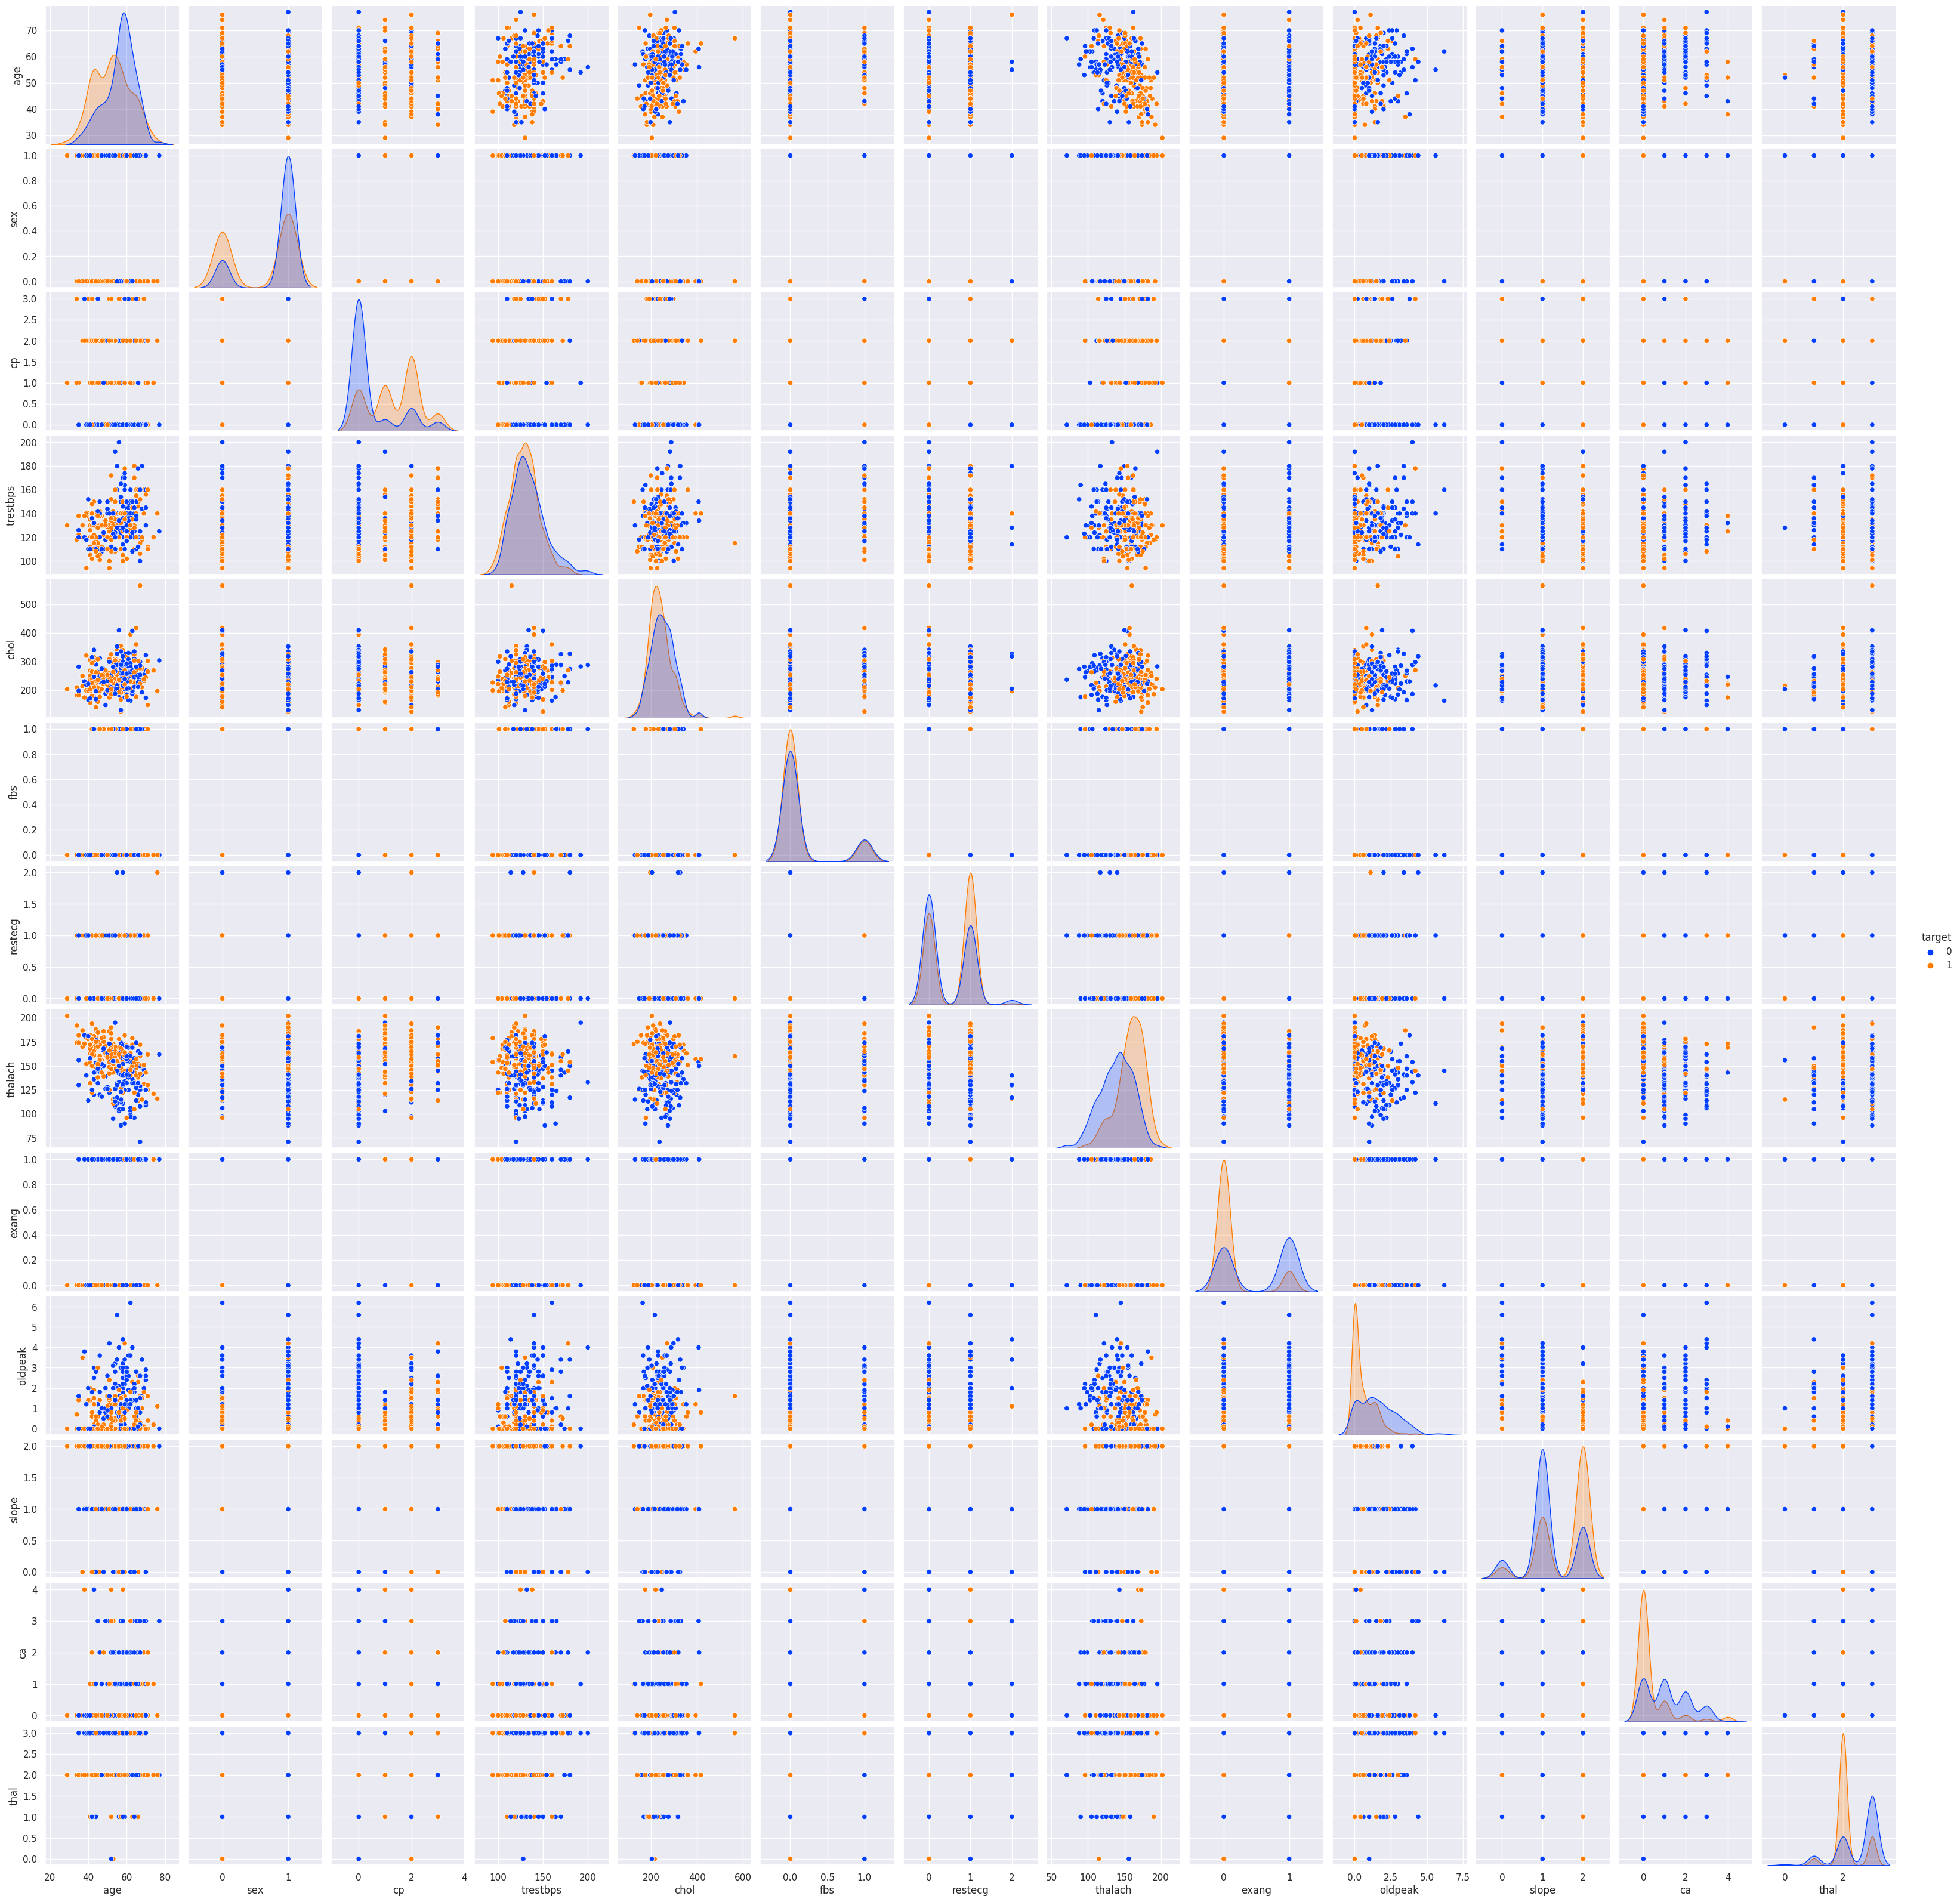

In [ ]:
sns.pairplot(df, hue="target",palette="bright")
plt.show()



<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> The above scatter plot shows the correlation among features, so that we can pick those features and classes which guarantee a linearly-separable demo dataset..</font>

In [ ]:
# arrays for features/attributes and target/class
X= df.drop('target',axis=1).values
y = df['target'].values

### 4. Do the correlational analysis on the dataset. Provide a visualization for the same. 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


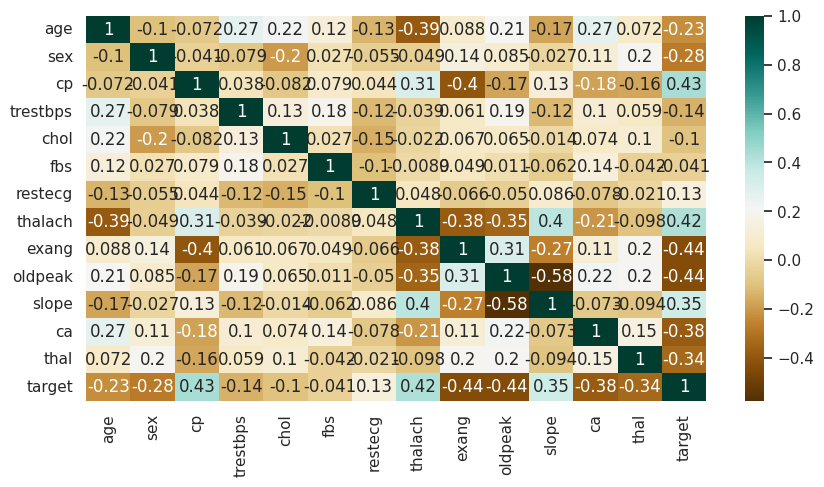

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr(method='pearson')
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
data_corr = df.corr('pearson')['target'][:-1]
golden_features_list = data_corr[abs(data_corr) > 0.4].sort_values(ascending=False)
print("There is {} strongly correlated values with target:\n{}".format(len(golden_features_list), golden_features_list))

There is 4 strongly correlated values with target:
cp         0.434854
thalach    0.422895
exang     -0.438029
oldpeak   -0.438441
Name: target, dtype: float64


<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> As you can see there are no attributes with correlation >0.5 so we are checking for attributes > 0.4. cp, thalach, exlang and oldpeak have higher correlation with target as compared to other attributes.
Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features </font>

## 3. Data Pre-processing and cleaning


### 1. Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. 

In [ ]:
# check any missing or null values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> As you can see there are no null values in the dataset.</font>




Outlier detection and removal

Lets check outlier for all continuous attributes

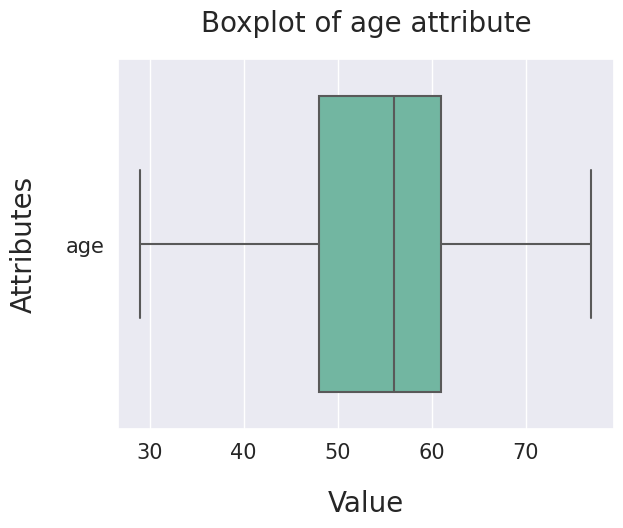

In [ ]:
#create the boxplot for age
ax = sns.boxplot(data = df[["age"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of age attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> As you can there are no outliers for age.</font>

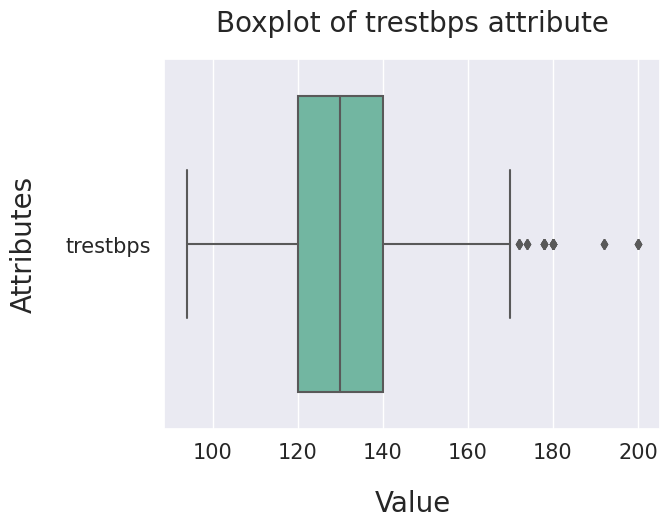

In [ ]:
#create the boxplot for trestbps
ax = sns.boxplot(data = df[["trestbps"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of trestbps attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> As you can see outliers exist for trestbps attribute.</font>

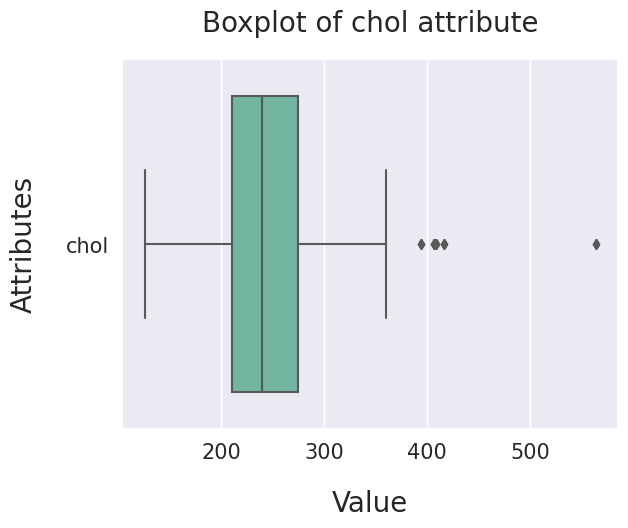

In [ ]:
#create the boxplot for chol
ax = sns.boxplot(data = df[["chol"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of chol attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> As you can see outliers exist for chol attribute.</font>

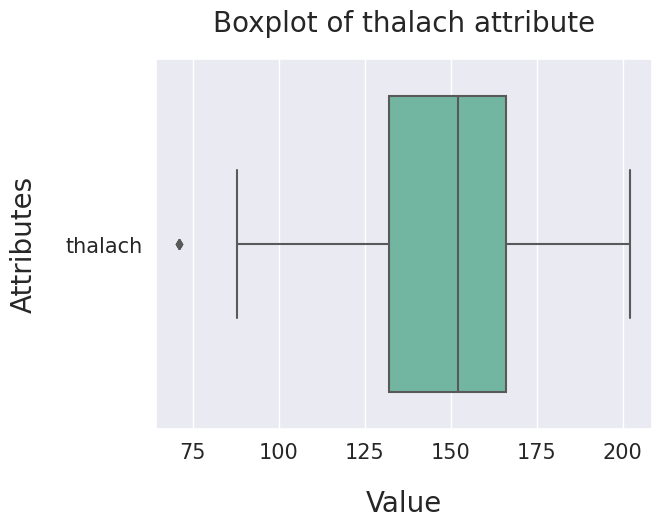

In [ ]:
#create the boxplot for thalach
ax = sns.boxplot(data = df[["thalach"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of thalach attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> As you can see outliers exist for thalach attribute.</font>

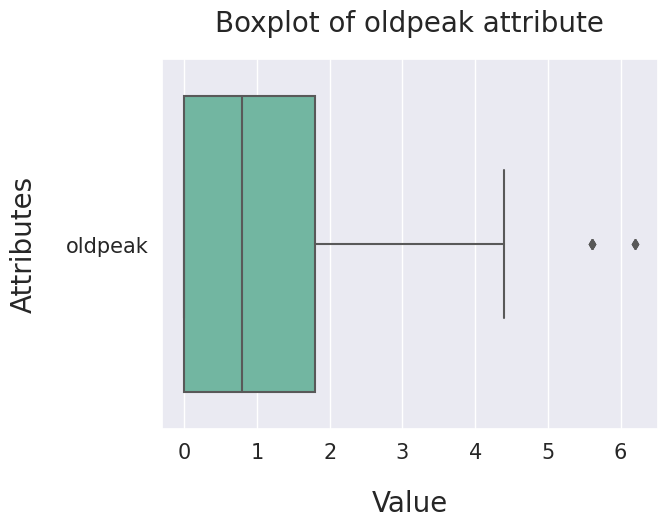

In [ ]:
#create the boxplot for oldpeak
ax = sns.boxplot(data = df[["oldpeak"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of oldpeak attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> As you can see outliers exist for chol attribute.</font>

In [ ]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


Lets now remove the outliers for trestbps, thalach, chol and oldpeak

In [ ]:
# define a function called 'outliers' that returns a list of index of outliers
def outliers(data, ft):
  Q1 = data[ft].quantile(0.25)
  Q3 = data[ft].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = data.index[(data[ft]< lower_bound)| (data[ft] > upper_bound)]

  return ls

In [ ]:
# create empty list to store the output indices from multiple columns
index_list = []

for feature in ['trestbps', 'chol', 'thalach', 'oldpeak']:
  index_list.extend(outliers(df, feature))

In [ ]:
print(index_list)
len(index_list) # this may include duplicate indices

[29, 47, 87, 137, 151, 175, 229, 246, 257, 294, 326, 343, 396, 436, 452, 496, 508, 509, 528, 609, 624, 636, 679, 688, 837, 891, 896, 944, 971, 986, 123, 158, 179, 192, 255, 450, 464, 481, 542, 578, 641, 665, 685, 889, 958, 996, 267, 296, 378, 559, 54, 55, 69, 393, 526, 613, 833]


57

In [ ]:
# define a function called 'remove' which returns a cleaned dataframe without outliers
def remove (data, ls):
  ls =  sorted(set(ls)) # set to remove duplicates
  df = data.drop(ls)
  return df

In [ ]:
df_cleaned = remove(df, index_list)

In [ ]:
df_cleaned.shape

(968, 14)

<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> As you can see outliers have been removed and now the number of samples in dataset is reduced to 968 from 1025. Number of columns remain the same.</font>

In [ ]:
df = df_cleaned

In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


Lets now check for skewness.

In [ ]:
df.skew().sort_values(ascending=False)

fbs         2.072297
ca          1.292436
oldpeak     0.953006
exang       0.736377
cp          0.500510
trestbps    0.277311
chol        0.211683
restecg     0.116938
target     -0.099450
age        -0.193653
thalach    -0.440569
slope      -0.493438
thal       -0.503288
sex        -0.958997
dtype: float64

1.   Positive value means the distribution is skewed to the right.
2.   Negative value means the distribution is skewed to the left.
3. 0 means perfect normal distribution. The bell shaped curve.

We will consider removing skewness for all attributes that have skewness greater than |0.5|. As you can see 'exang', 'oldpeak', 'ca' and 'fbs' have skewed data.

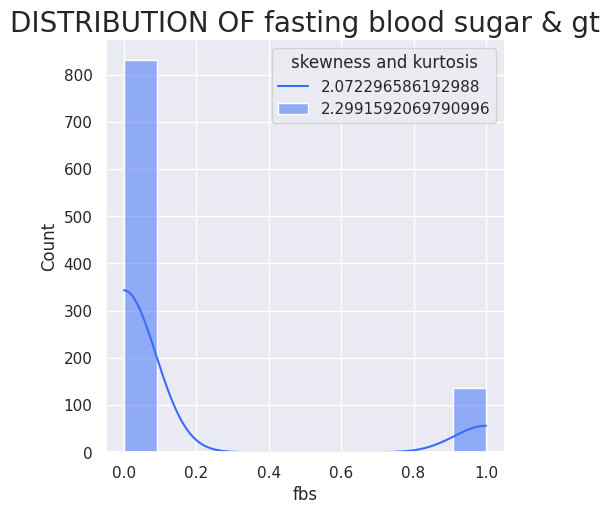

In [ ]:
sns.displot(df["fbs"],kde=True)
plt.title("DISTRIBUTION OF fasting blood sugar & gt",fontsize=20)
skewness=str(df["fbs"].skew())
kurtosis=str(df["fbs"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show()

As we can see the above plot is not normal distribution as there is some positive skewed data



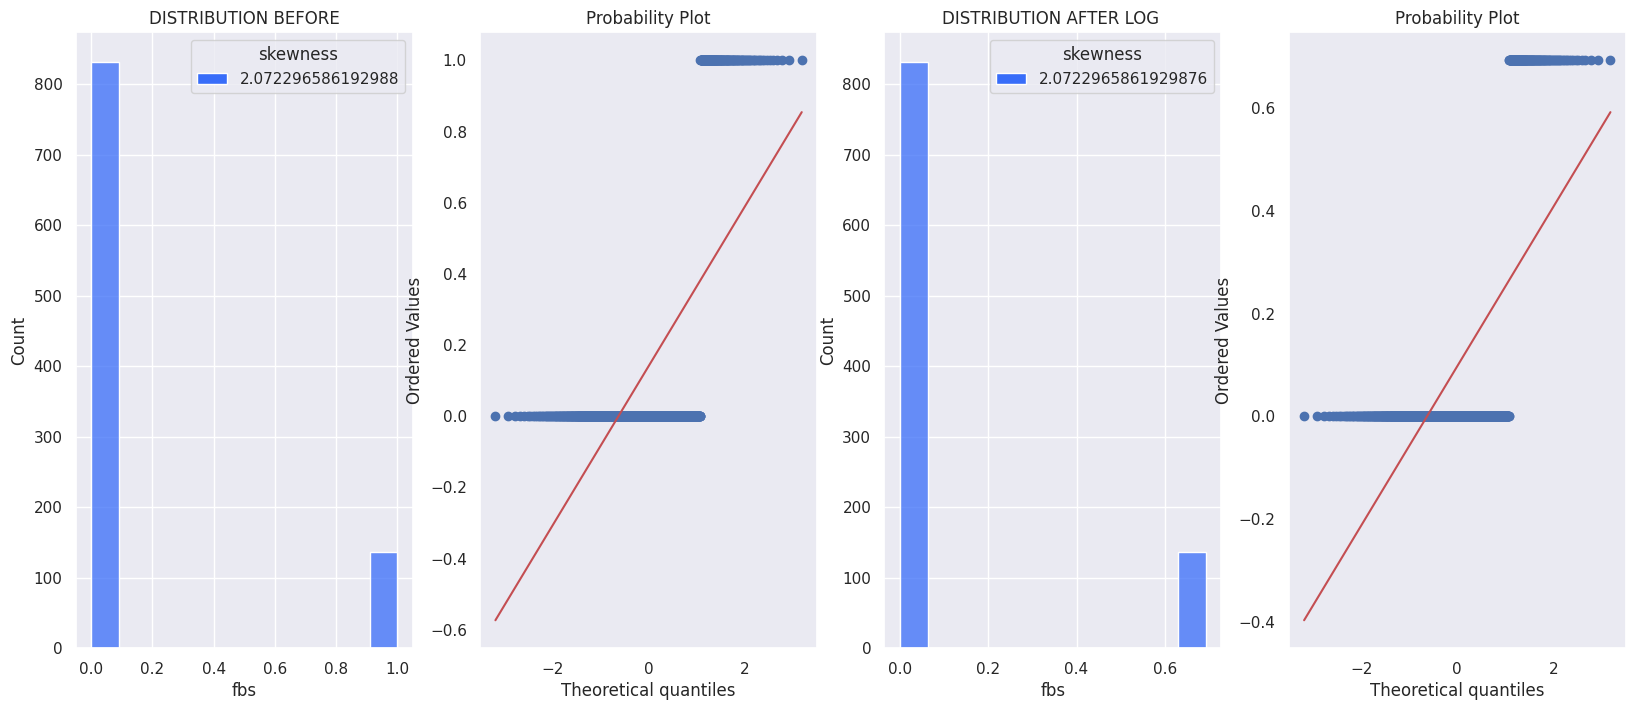

In [ ]:
plt.figure(figsize=(20,8))

## log transformation
plt.subplot(1,4,1)
sns.histplot(df["fbs"])
plt.title("DISTRIBUTION BEFORE",)
skewness=str(df["fbs"].skew())
plt.legend([skewness],title=("skewness"))

plt.subplot(1,4,2)
stats.probplot(df["fbs"],dist="norm",plot=plt)
plt.grid()

plt.subplot(1,4,3)
log1_target=np.log1p(df["fbs"])
ax=sns.histplot(log1_target)
plt.title("DISTRIBUTION AFTER LOG ",)
skewness=str(log1_target.skew())
plt.legend([skewness],title=("skewness"))

plt.subplot(1,4,4)
stats.probplot(log1_target,dist="norm",plot=plt)
plt.grid()

In [ ]:
df['fbs']=log1_target

In [ ]:
df.skew().sort_values(ascending=False)

fbs         2.072297
ca          1.292436
oldpeak     0.953006
exang       0.736377
cp          0.500510
trestbps    0.277311
chol        0.211683
restecg     0.116938
target     -0.099450
age        -0.193653
thalach    -0.440569
slope      -0.493438
thal       -0.503288
sex        -0.958997
dtype: float64

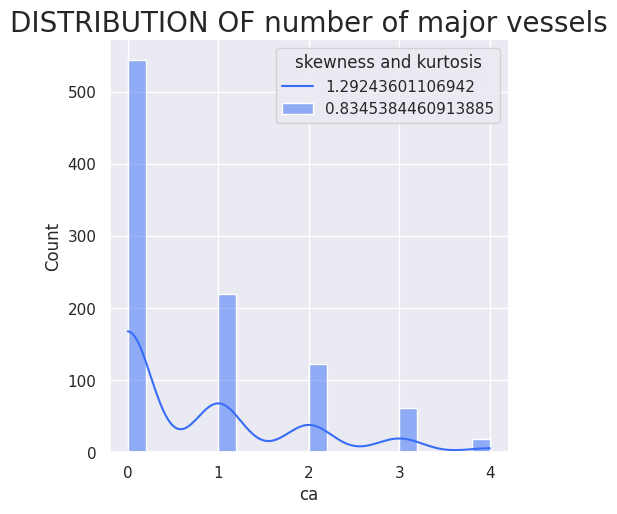

In [ ]:
sns.displot(df["ca"],kde=True)
plt.title("DISTRIBUTION OF number of major vessels",fontsize=20)
skewness=str(df["ca"].skew())
kurtosis=str(df["ca"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show()

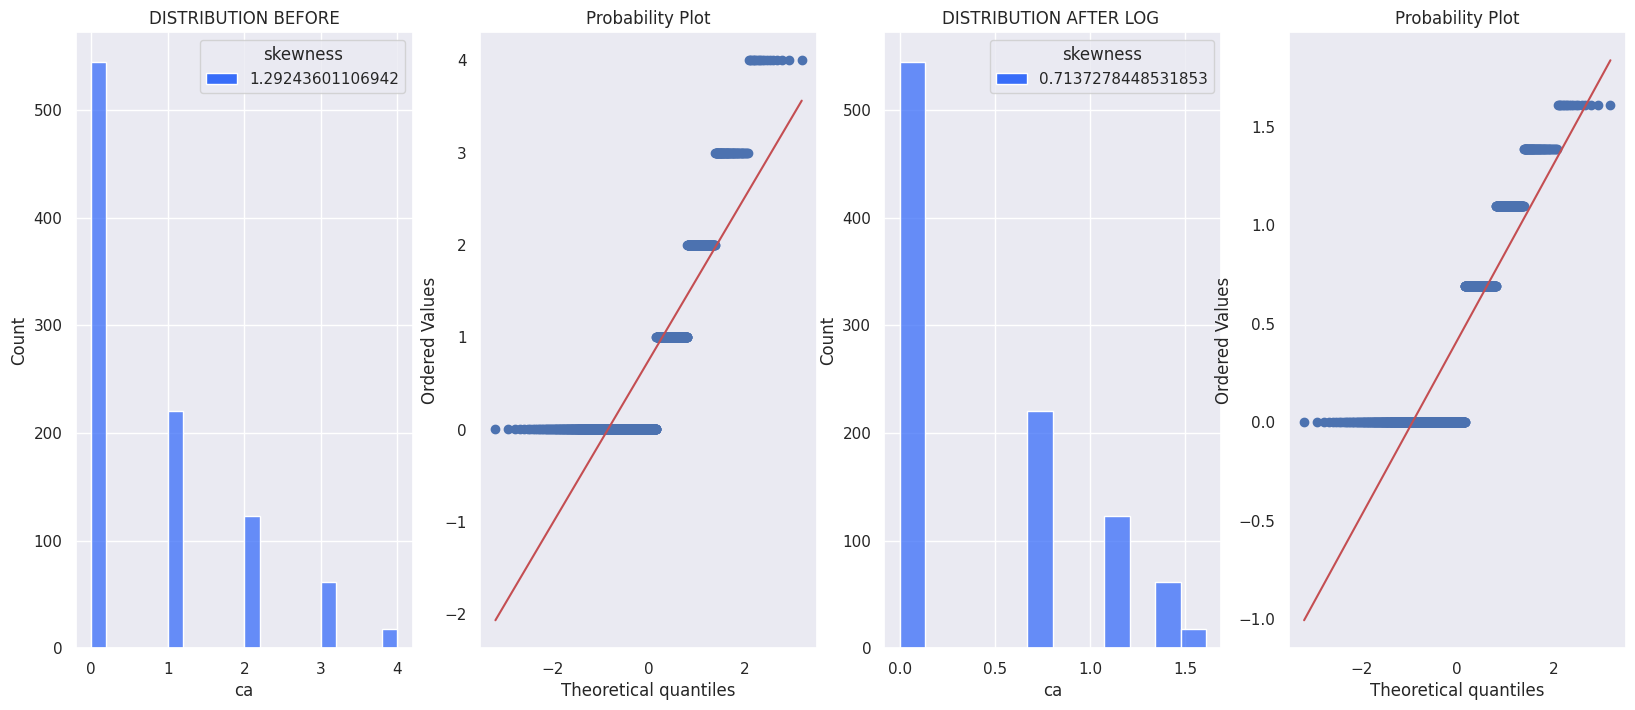

In [ ]:
plt.figure(figsize=(20,8))

## log transformation
plt.subplot(1,4,1)
sns.histplot(df["ca"])
plt.title("DISTRIBUTION BEFORE",)
skewness=str(df["ca"].skew())
plt.legend([skewness],title=("skewness"))

plt.subplot(1,4,2)
stats.probplot(df["ca"],dist="norm",plot=plt)
plt.grid()

plt.subplot(1,4,3)
log2_target=np.log1p(df["ca"])
ax=sns.histplot(log2_target)
plt.title("DISTRIBUTION AFTER LOG ",)
skewness=str(log2_target.skew())
plt.legend([skewness],title=("skewness"))

plt.subplot(1,4,4)
stats.probplot(log2_target,dist="norm",plot=plt)
plt.grid()

In [ ]:
df['ca']=log2_target

In [ ]:
df.skew().sort_values(ascending=False)

fbs         2.072297
oldpeak     0.953006
exang       0.736377
ca          0.713728
cp          0.500510
trestbps    0.277311
chol        0.211683
restecg     0.116938
target     -0.099450
age        -0.193653
thalach    -0.440569
slope      -0.493438
thal       -0.503288
sex        -0.958997
dtype: float64

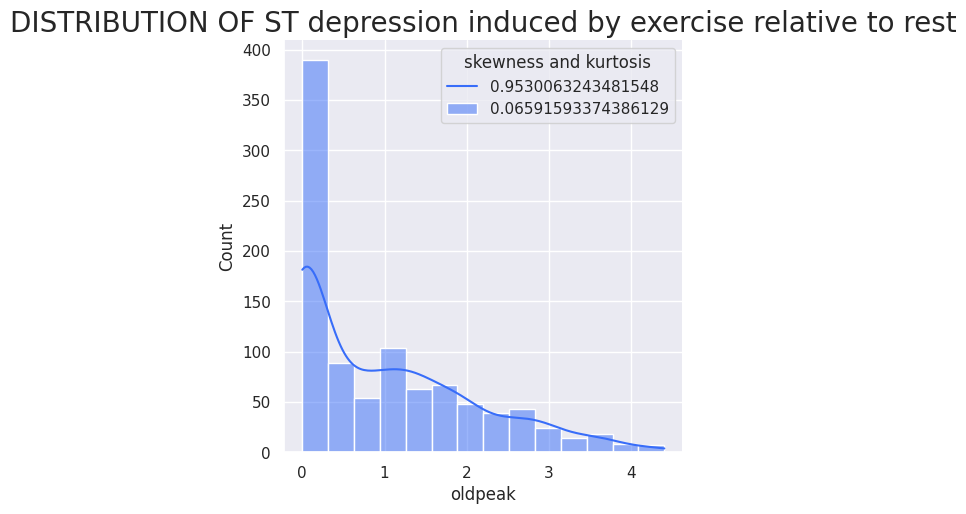

In [ ]:
sns.displot(df["oldpeak"],kde=True)
plt.title("DISTRIBUTION OF ST depression induced by exercise relative to rest",fontsize=20)
skewness=str(df["oldpeak"].skew())
kurtosis=str(df["oldpeak"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show()

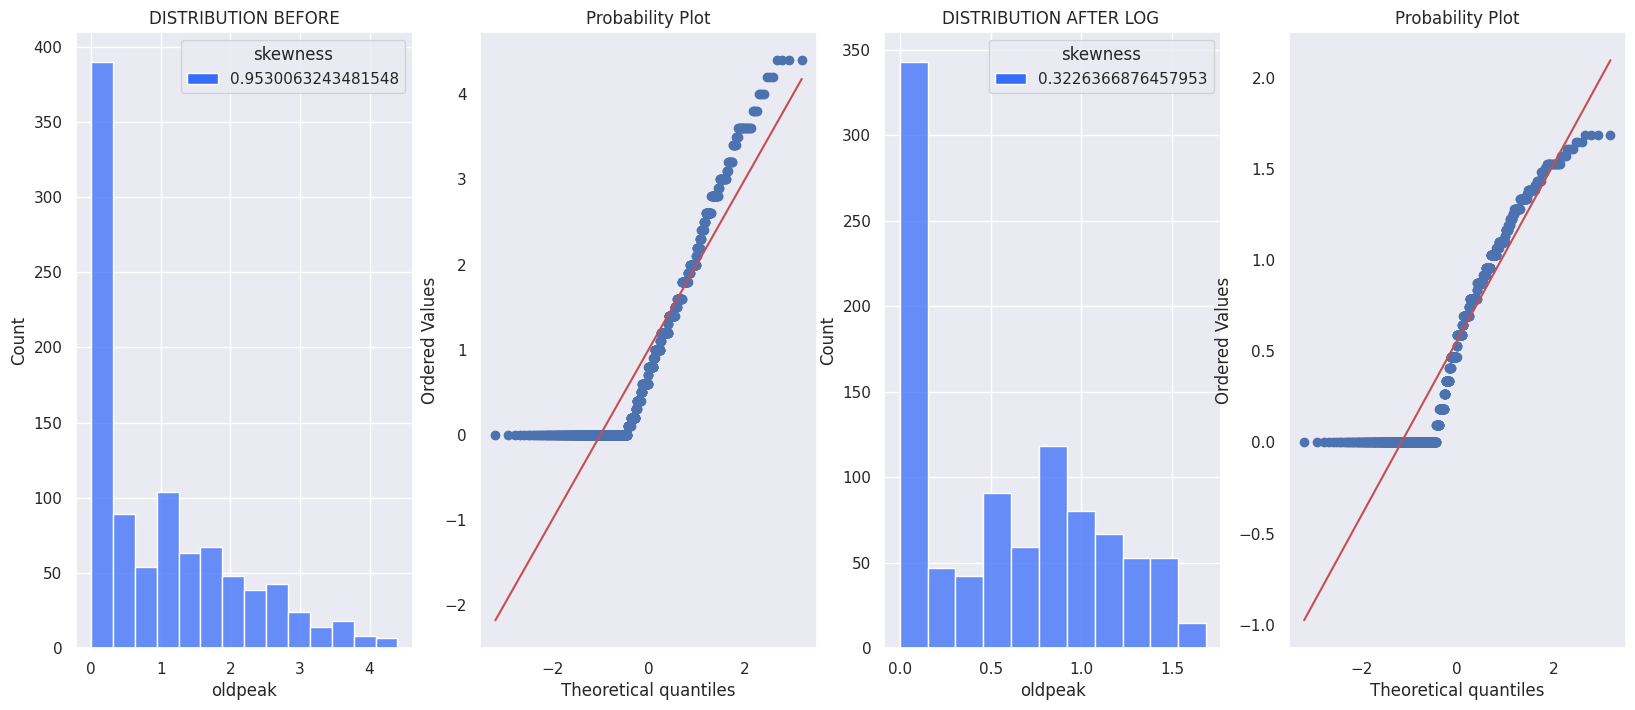

In [ ]:
plt.figure(figsize=(20,8))

## log transformation
plt.subplot(1,4,1)
sns.histplot(df["oldpeak"])
plt.title("DISTRIBUTION BEFORE",)
skewness=str(df["oldpeak"].skew())
plt.legend([skewness],title=("skewness"))

plt.subplot(1,4,2)
stats.probplot(df["oldpeak"],dist="norm",plot=plt)
plt.grid()

plt.subplot(1,4,3)
log3_target=np.log1p(df["oldpeak"])
ax=sns.histplot(log3_target)
plt.title("DISTRIBUTION AFTER LOG ",)
skewness=str(log3_target.skew())
plt.legend([skewness],title=("skewness"))

plt.subplot(1,4,4)
stats.probplot(log3_target,dist="norm",plot=plt)
plt.grid()

In [ ]:
df['oldpeak']=log3_target

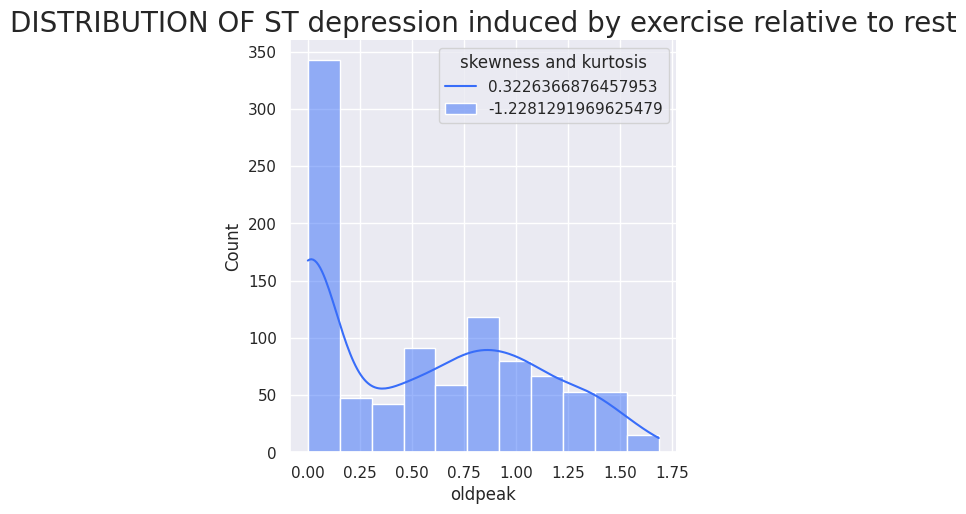

In [ ]:
sns.displot(df["oldpeak"],kde=True)
plt.title("DISTRIBUTION OF ST depression induced by exercise relative to rest",fontsize=20)
skewness=str(df["oldpeak"].skew())
kurtosis=str(df["oldpeak"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show()

In [ ]:
df.skew().sort_values(ascending=False)

fbs         2.072297
exang       0.736377
ca          0.713728
cp          0.500510
oldpeak     0.322637
trestbps    0.277311
chol        0.211683
restecg     0.116938
target     -0.099450
age        -0.193653
thalach    -0.440569
slope      -0.493438
thal       -0.503288
sex        -0.958997
dtype: float64

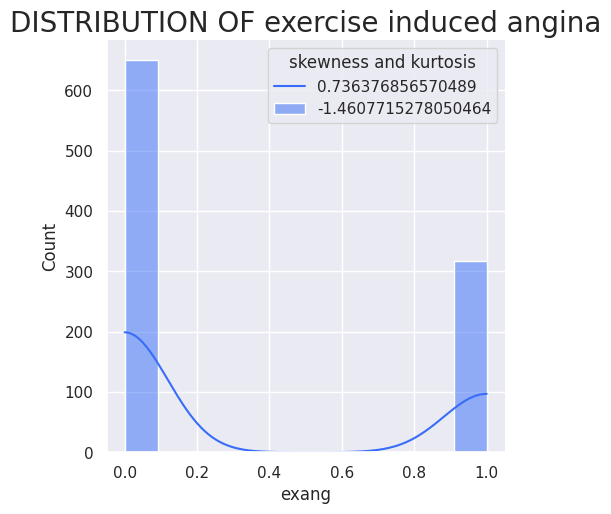

In [ ]:
sns.displot(df["exang"],kde=True)
plt.title("DISTRIBUTION OF exercise induced angina",fontsize=20)
skewness=str(df["exang"].skew())
kurtosis=str(df["exang"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show()

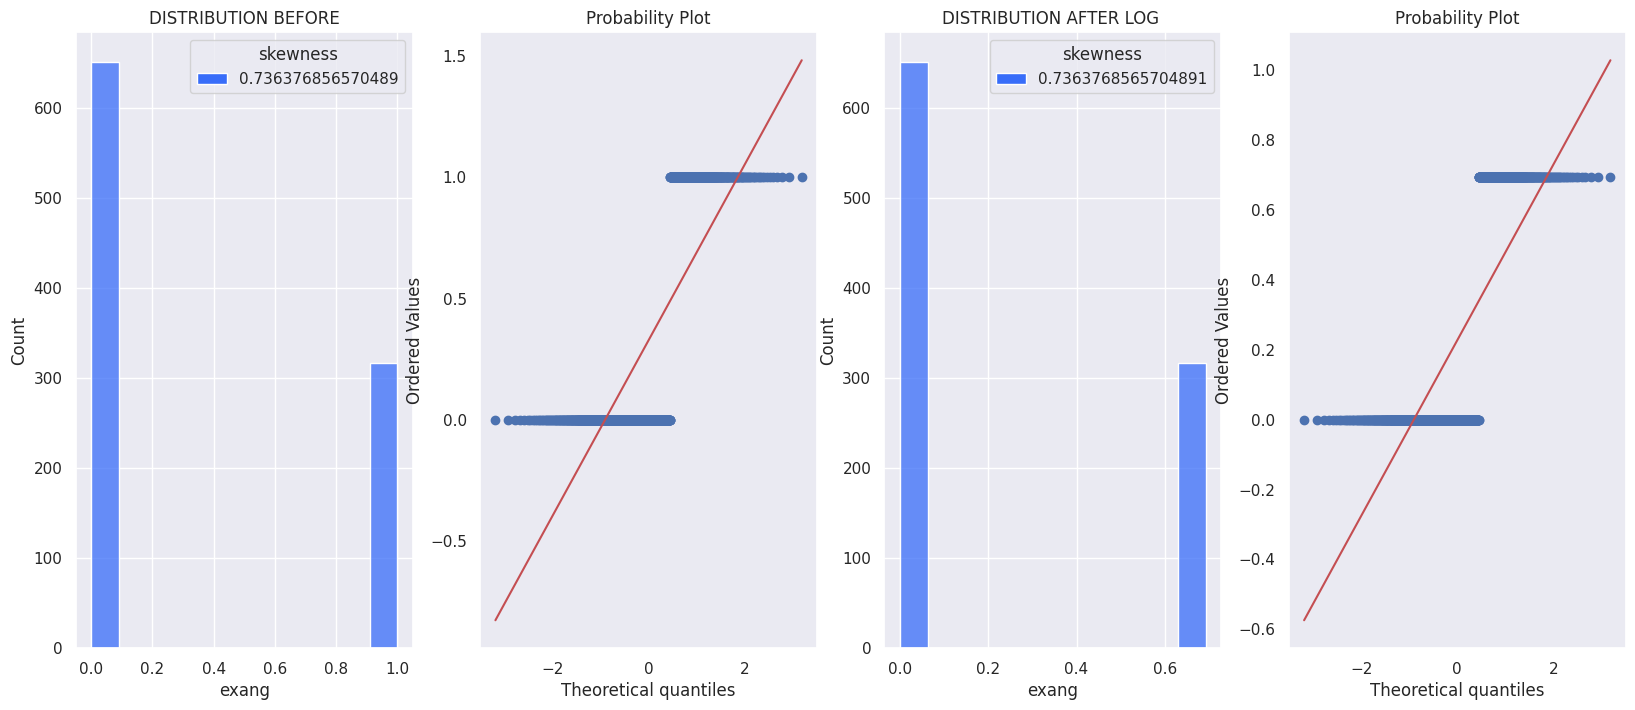

In [ ]:
plt.figure(figsize=(20,8))

## log transformation
plt.subplot(1,4,1)
sns.histplot(df["exang"])
plt.title("DISTRIBUTION BEFORE",)
skewness=str(df["exang"].skew())
plt.legend([skewness],title=("skewness"))

plt.subplot(1,4,2)
stats.probplot(df["exang"],dist="norm",plot=plt)
plt.grid()

plt.subplot(1,4,3)
log4_target=np.log1p(df["exang"])
ax=sns.histplot(log4_target)
plt.title("DISTRIBUTION AFTER LOG ",)
skewness=str(log4_target.skew())
plt.legend([skewness],title=("skewness"))

plt.subplot(1,4,4)
stats.probplot(log4_target,dist="norm",plot=plt)
plt.grid()

In [ ]:
df['exang']=log4_target

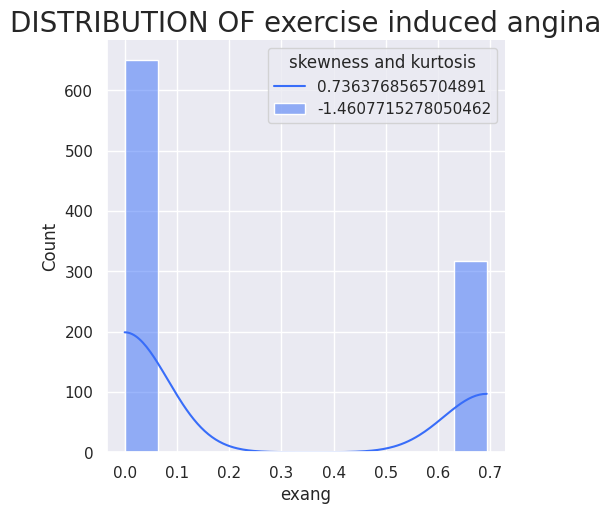

In [ ]:
sns.displot(df["exang"],kde=True)
plt.title("DISTRIBUTION OF exercise induced angina",fontsize=20)
skewness=str(df["exang"].skew())
kurtosis=str(df["exang"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show()

In [ ]:
df.skew().sort_values(ascending=False)

fbs         2.072297
exang       0.736377
ca          0.713728
cp          0.500510
oldpeak     0.322637
trestbps    0.277311
chol        0.211683
restecg     0.116938
target     -0.099450
age        -0.193653
thalach    -0.440569
slope      -0.493438
thal       -0.503288
sex        -0.958997
dtype: float64

<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> As you can see we were able to reduce skewness in some of the attributes, for the others it may need further processing.</font>

### 2. Apply the feature transformation techniques like Standardization, Normalization, etc. 

Since we have attributes with values with different scales, we need to normalize the data so that they are brought on the same scale.

In [ ]:
df.shape

(968, 14)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


now let's normalize using mean normalization.

In [ ]:
# normalize the features using mean normalization
df = (df - df.mean())/df.std()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.227165,0.629615,-0.93339,-0.319213,-0.672680,-0.404095,0.899203,0.817058,-0.697453,0.261434,0.974679,1.336049,1.116299,-1.050337
1,-0.117601,0.629615,-0.93339,0.659661,-0.871512,2.472110,-1.018041,0.243933,1.432308,1.666925,-2.330011,-0.813744,1.116299,-1.050337
2,1.744997,0.629615,-0.93339,0.985953,-1.512194,-0.404095,0.899203,-1.078662,1.432308,1.412288,-2.330011,-0.813744,1.116299,-1.050337
3,0.758916,0.629615,-0.93339,1.181728,-0.871512,-0.404095,0.899203,0.508452,-0.697453,-1.095710,0.974679,0.542624,1.116299,-1.050337
4,0.868481,-1.586631,-0.93339,0.529145,1.138904,2.472110,0.899203,-1.916306,-0.697453,0.988935,-0.677666,1.898992,-0.489314,-1.050337


<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> As you can the data has been normalized and its now easier to process the data and build the model.</font>

## 4. Model Building


### 1. Split the dataset into training and test sets. Justify your choice of split. You may experiment with different split to get the final split.

the proportion of labels should remain same in the splits, so we use "stratify"

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

### 2. Build Model Development using KNN. Identify the optimal K value.

In [ ]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,21)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #print("Training accuracy for",i,"is", train_accuracy[i])

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
    test_accuracy[i]
    print("Accuracy for",i+1,"is", test_accuracy[i])

Accuracy for 1 is 0.9341463414634147
Accuracy for 2 is 0.8780487804878049
Accuracy for 3 is 0.8073170731707318
Accuracy for 4 is 0.7609756097560976
Accuracy for 5 is 0.7219512195121951
Accuracy for 6 is 0.7
Accuracy for 7 is 0.7121951219512195
Accuracy for 8 is 0.6926829268292682
Accuracy for 9 is 0.7024390243902439
Accuracy for 10 is 0.7
Accuracy for 11 is 0.7048780487804878
Accuracy for 12 is 0.7292682926829268
Accuracy for 13 is 0.7365853658536585
Accuracy for 14 is 0.7365853658536585
Accuracy for 15 is 0.7390243902439024
Accuracy for 16 is 0.7170731707317073
Accuracy for 17 is 0.7170731707317073
Accuracy for 18 is 0.7097560975609756
Accuracy for 19 is 0.7048780487804878
Accuracy for 20 is 0.7048780487804878


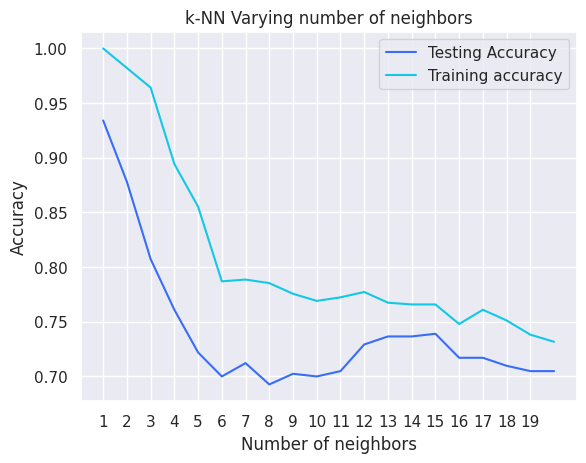

In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.xticks(range(1, 20))
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Get accuracy.
knn.score(X_test,y_test)

0.7121951219512195

<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> In case of classification algorithms score method represents accuracy. The value of k (i.e 7) we selected above was selected by observing the curve of accuracy vs number of neighbors. </font>

## 5. Performance Evaluation

<u><b> Confusion Matrix </b></u>

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.

In [ ]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[142,  58],
       [ 60, 150]])

Confusion matrix can also be obtained using crosstab method of pandas.

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,142,58,200
1,60,150,210
All,202,208,410


<b> ROC (Reciever Operating Charecteristic) curve </b>

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

4) The area under the curve is a measure of test accuracy.

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
y_predict= knn.predict(X_test)
for i in range(100):
    print(y_test[i],y_predict[i],y_pred_proba[i],"\n")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

0 0 0.0 

1 0 0.42857142857142855 

1 1 0.8571428571428571 

1 0 0.42857142857142855 

1 1 1.0 

1 1 0.7142857142857143 

1 1 0.8571428571428571 

0 0 0.42857142857142855 

0 0 0.0 

0 0 0.2857142857142857 

1 1 0.8571428571428571 

1 0 0.42857142857142855 

1 0 0.42857142857142855 

0 0 0.14285714285714285 

1 1 0.5714285714285714 

0 0 0.2857142857142857 

0 0 0.0 

0 0 0.0 

1 1 0.7142857142857143 

0 0 0.14285714285714285 

1 0 0.42857142857142855 

1 1 1.0 

1 0 0.42857142857142855 

0 0 0.42857142857142855 

1 1 0.7142857142857143 

0 1 0.8571428571428571 

0 1 0.8571428571428571 

0 0 0.0 

1 1 0.7142857142857143 

0 0 0.2857142857142857 

0 0 0.14285714285714285 

0 0 0.14285714285714285 

1 1 1.0 

1 1 0.7142857142857143 

1 1 1.0 

1 1 1.0 

0 0 0.0 

0 0 0.2857142857142857 

1 0 0.2857142857142857 

1 1 1.0 

0 0 0.42857142857142855 

0 0 0.42857142857142855 

0 1 0.5714285714285714 

1 1 1.0 

0 0 0.42857142857142855 

0 1 0.7142857142857143 

1 0 0.42857142857142855 

1 0 

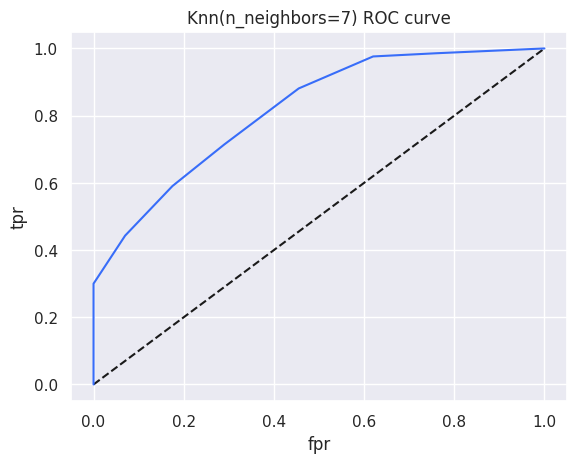

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
roc_auc_score(y_test,y_pred_proba)

0.8157142857142857

<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> The accuracy score is ~ 82% with k = 7. </font>